## Task-D: Collinear features and their effect on linear models

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('task_d.csv')

In [11]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [12]:
X = data.drop(['target'], axis=1)
Y = data['target']

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

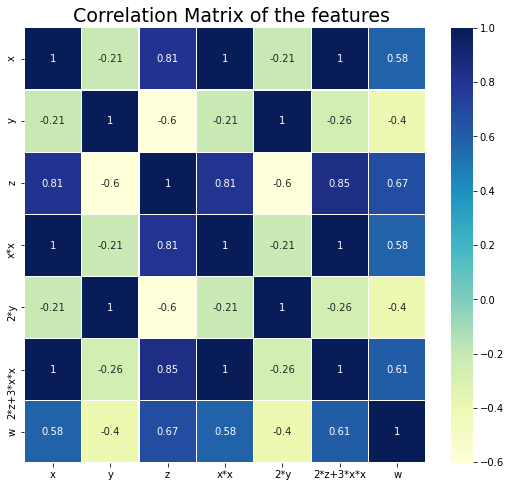

In [14]:
z = data.drop(['target'], axis=1)

corrmat = z.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)
plt.title("  Correlation Matrix of the features",fontsize=19) 
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,Y.values, test_size=0.3, random_state=0)

In [42]:
param_grid = {'alpha':[0.0001*pow(10,i) for i in range(8)]} 
lin_svc_lg = SGDClassifier(loss='log',random_state = True)
grid = GridSearchCV(lin_svc_lg, param_grid=param_grid,cv=3) 
grid.fit(X_train ,y_train)
grid.best_params_


{'alpha': 0.01}

In [43]:
best_model = SGDClassifier(loss='log', alpha = 0.01,random_state = True)
best_model.fit(X_train,y_train)
accuracy = best_model.score(X_test,y_test)
print(f'Accuracy is {accuracy*100}%')


Accuracy is 100.0%


In [50]:
#perturbation testing
index = []

clf_lor = SGDClassifier(loss='log', alpha = 0.01,random_state = True)
clf_lor.fit(X_train, y_train)
w1=clf_lor.coef_


X_train_add=X_train + 0.01

clf_lor.fit(X_train_add, y_train)
w2=clf_lor.coef_


change_w= np.abs(((w1-w2)/w1)*100)

w_change=[]
for i in range(X_train.shape[1]):
  w_change.append(change_w[0,i])

top_4_weight = sorted(w_change, reverse =True)[:4] 
print(f'the top 4 features which have higher % change in weights compare to the other feature are:') 
for i in  top_4_weight:
  print(f'{i} for {column_name[w_change.index(i)]}')




the top 4 features which have higher % change in weights compare to the other feature are:
0.11850400440689489 for x
0.09973964095686787 for x*x
0.07530220003179594 for 2*z+3*x*x
0.06180149379768311 for w


##Observation


1. Change in weights define how much feature is collinear to other feature. After adding noise to feature and apply logistic regression . i have found feature 'x' is more colinear than other followed by 'x*x' , '2*z+3*x*x' and 'w'.



In [55]:
param_grid = {'alpha':[0.0001*pow(10,i) for i in range(8)]} 
lin_svc_lg = SGDClassifier(loss='hinge',random_state = True)
grid = GridSearchCV(lin_svc_lg, param_grid=param_grid,cv=3) 
grid.fit(X_train ,y_train)
grid.best_params_

{'alpha': 1.0}

In [56]:
best_model = SGDClassifier(loss='hinge', alpha = 1,random_state = True)
best_model.fit(X_train,y_train)
accuracy = best_model.score(X_test,y_test)
print(f'Accuracy is {accuracy*100}%')

Accuracy is 100.0%


In [57]:
#perturbation testing
index = []

clf_svm = SGDClassifier(loss='hinge', alpha =1,random_state = True)
clf_svm.fit(X_train, y_train)
w1=clf_svm.coef_


X_train_add=X_train + 0.01

clf_svm.fit(X_train_add, y_train)
w2=clf_svm.coef_


change_w= np.abs(((w1-w2)/w1)*100)

w_change=[]
for i in range(X_train.shape[1]):
  w_change.append(change_w[0,i])


top_4_weight = sorted(w_change, reverse =True)[:4] 
print(f'the top 4 features which have higher % change in weights compare to the other feature are:') 
for i in  top_4_weight:
  print(f'{i} for {column_name[w_change.index(i)]}')

the top 4 features which have higher % change in weights compare to the other feature are:
1.3951005531383227 for w
1.1367710253258412 for x
1.1323283046063217 for x*x
0.8739062358557589 for 2*z+3*x*x


##Observation


1. Change in weights define how much feature is collinear to other feature. After adding noise to feature and apply linear SVM . i have found feature 'w' is more colinear than other followed by 'x' , 'x*x' and '2*z+3*x*x'.